In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Exploration

In [25]:
df.shape

(303, 14)

In [26]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [27]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [31]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Data Visualisation

Text(0, 0.5, 'Count')

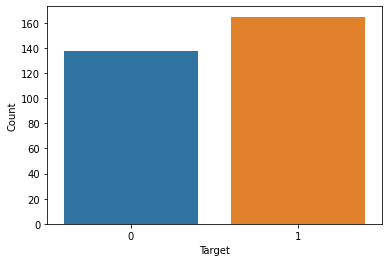

In [33]:
# Visualise to check if the dataset is balanced or not.
count= sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

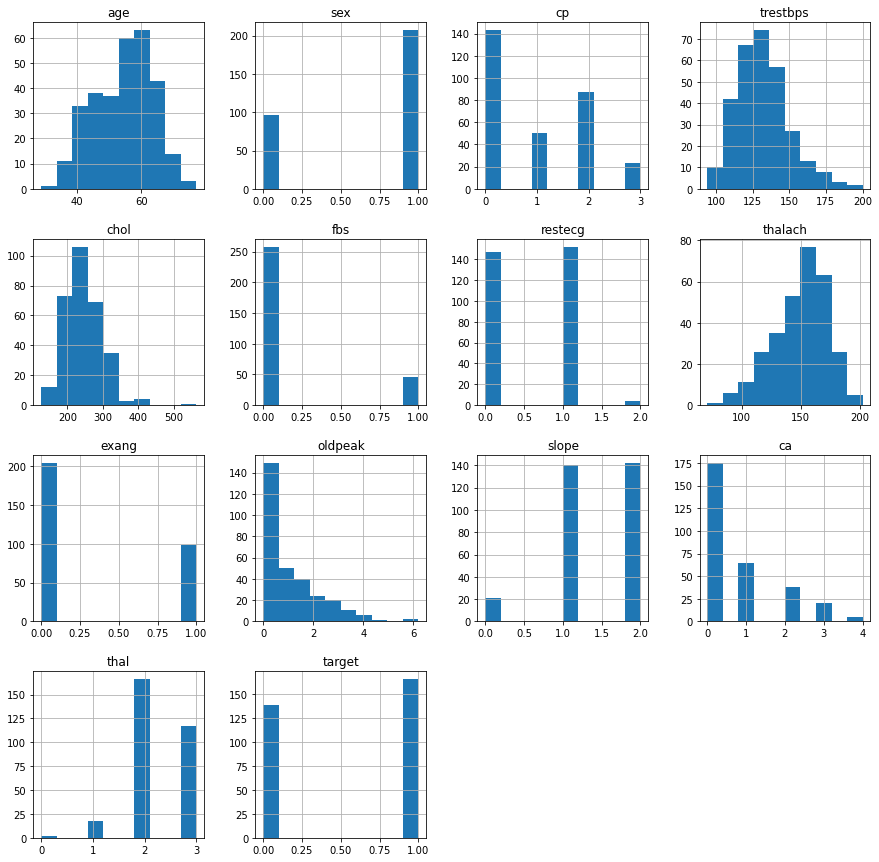

In [34]:
# histogram for  entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
hist= df.hist(ax=ax)

In [35]:
# splitting dataset 
x=df.iloc[:,:-1].values
y=df.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression( random_state=0)


In [42]:
lr.fit(x_train , y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred_lr=lr.predict(x_test)

In [51]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confu_lr=confusion_matrix(y_test,y_pred_lr)
print("THe confusion matrix is ", print(confu_lr))

print("-"*50)
from sklearn.metrics import accuracy_score
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_lr

[[24  9]
 [ 3 40]]
THe confusion matrix is  None
--------------------------------------------------


0.8421052631578947

### Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [53]:
y_pred_nb=nb.predict(x_test)

array([[24,  9],
       [ 4, 39]], dtype=int64)

In [57]:
confu_nb=confusion_matrix(y_test,y_pred_nb)
print("The confusion matrix is ", confu_nb)

print("-"*50)
from sklearn.metrics import accuracy_score
ac_nb=accuracy_score(y_test,y_pred_nb)
ac_nb

The confusion matrix is  [[24  9]
 [ 4 39]]
--------------------------------------------------


0.8289473684210527

### SVC

In [58]:

from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [59]:
y_pred_svc=svc.predict(x_test)


In [61]:
confu_svc=confusion_matrix(y_test,y_pred_svc)
print("The confusion matrix is ", confu_svc)

print("-"*50)
from sklearn.metrics import accuracy_score
ac_svc=accuracy_score(y_test,y_pred_svc)
ac_svc

The confusion matrix is  [[24  9]
 [ 3 40]]
--------------------------------------------------


0.8421052631578947

### Random Forest Classification

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy',n_estimators=25,random_state=27)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=27)

In [ ]:
y_pred_rfc=rfc.predict(x_test)

In [70]:
y_pred_rfc=rfc.predict(x_test)
confu_rfc=confusion_matrix(y_test,y_pred_rfc)
print(" the confusion matrix is ", confu_rfc)

print("-"*50)
from sklearn.metrics import accuracy_score
ac_rfc=accuracy_score(y_test,y_pred_rfc)
ac_rfc


 the confusion matrix is  [[25  8]
 [ 5 38]]
--------------------------------------------------


0.8289473684210527